#DENUNCIAS DE DELITOS EN BOLIVIA 2000 - 2013
Con el objetivo de resaltar los espectaculares beneficios que nos dan las herramientas de analisis de datos, quiero mostrarles un proceso de preparacion de datos relacionado a las denuncias de delitos realizadas en Bolivia desde el año 2000 hasta el 2013, esta información es publica y se encuentra en la pagina del INE(Instituto Nacional de Estadistica) http://www.ine.gob.bo/indice/EstadisticaSocial.aspx?codigo=30902

El objetivo de este pequeño tutorial es ver paso a paso la preparación de datos para que luego pueda ser explotada por herramientas de visualización (Es mejor aprender con un caso de uso real no?). La información es basica, pero suficiente para explicar todo el proceso, lo que siga dependera de tu imaginación!!!
Los graficos que veran al final de este Notebook tambien estan disponibles en Tableau Public, aca les dejo el Link:

##Importando lo necesario
Es como un herrero cuando tiene que empezar su trabajo, necesitamos alistar nuestras herramientas!!. La primera fila es necesaria para ver graficos en este entorno y la segunda fila importa la libreria que manipula estructuras de datos con una facilidad impresionante, deja que te lo muestre mas adelante.

In [50]:
%pylab inline
import pandas as pd #Libreria que maneja estructuras de datos

Populating the interactive namespace from numpy and matplotlib


##Leemos el archivo

In [2]:
df_datos_brutos = pd.read_csv("analysis/FileName2015_10_15_09_59_24.csv", sep=';')

##Exploramos la data
Fijense que hay que transformar la data

In [3]:
df_denuncias

,DESCRIPCION,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,BOLIVIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Contra la integridad corporal y la salud,5275,5087,4926,5036,6108,6758,6106,7453,7909,9201,9646,1027,11211,12665
2,Homicidio,3078,2957,261,2565,3748,876,2724,1013,1216,113,2299,2586,1457,2516
3,Violacion estupro y abuso deshonesto,2727,2198,1739,1756,221,1076,1725,1982,2168,256,3485,3093,4361,4316
4,Estafa y otras defraudaciones,5939,4639,267,2674,3662,357,3458,3421,4076,4807,5562,5713,6884,7411
5,Robo,16794,17714,15134,14589,12709,12542,12766,15436,18597,19242,18165,17587,21677,22549
6,Chuquisaca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Contra la integridad corporal y la salud,303,244,290,162,92,193,387,849,1122,1015,733,954,974,973
8,Homicidio,13,21,20,69,66,18,189,12,44,61,22,109,46,90
9,Violacion estupro y abuso deshonesto,80,90,99,105,72,24,71,80,110,144,184,219,268,161


##Identificamos las filas que tengan NULL
Filtramos las filas que tienen NULL o NaN en la data para luego obtener un dataframe con una columna index

In [4]:
df_depto = df_denuncias[df_denuncias['2000'].isnull()][['DESCRIPCION']]
df_depto.columns = ['depto']
df_depto = df_depto.reset_index()
df_depto

,index,depto
0,0,BOLIVIA
1,6,Chuquisaca
2,12,La Paz
3,18,Cochabamba
4,24,Oruro
5,30,Potosi
6,36,Tarija
7,42,Santa Cruz
8,48,Beni
9,54,Pando


##Obtenemos los rangos de los bloques de nuestra data

In [5]:
df_depto.loc[:, 'inicio'] = df_depto['index'] + 1
df_depto.loc[:, 'fin'] = df_depto['index'].shift(-1) - 1
df_depto

,index,depto,inicio,fin
0,0,BOLIVIA,1,5
1,6,Chuquisaca,7,11
2,12,La Paz,13,17
3,18,Cochabamba,19,23
4,24,Oruro,25,29
5,30,Potosi,31,35
6,36,Tarija,37,41
7,42,Santa Cruz,43,47
8,48,Beni,49,53
9,54,Pando,55,NaN


##El rango fin de la ultima fila
Fijense que el ultimo dato es NaN, basicamente el siguiente proceso identifica el ultimo valor de la tabla general para el llenado correspondiente en la tabla de rangos

In [6]:
last = df_denuncias.tail(1)
last_depto = df_depto.tail(1)
df_depto.loc[df_depto['depto']==last_depto['depto'].values[0], 'fin'] = last.index.values[0]
df_depto

,index,depto,inicio,fin
0,0,BOLIVIA,1,5
1,6,Chuquisaca,7,11
2,12,La Paz,13,17
3,18,Cochabamba,19,23
4,24,Oruro,25,29
5,30,Potosi,31,35
6,36,Tarija,37,41
7,42,Santa Cruz,43,47
8,48,Beni,49,53
9,54,Pando,55,59


##Creamos una lista de la columna depto

In [7]:
lista = df_depto['depto'].tolist()

##Recoremos la lista y creamos los dataframe con su locación correspondiente

In [8]:
cont = 0
list_df = []
for i in lista:
    cont += 1
    descripcion = df_depto[df_depto['depto']=='%s' %(i)]['depto'].values[0]
    ini = int(df_depto[df_depto['depto']=='%s' %(i)]['inicio'].values[0])
    fin = int(df_depto[df_depto['depto']=='%s' %(i)]['fin'].values[0])
    df_aux = aux = df_denuncias.ix[ini:fin].copy()
    df_aux['LOCATION'] = descripcion
    list_df.append(aux)

##Unimos todos los trozos de la lista de dataframes

In [29]:
df_final = pd.concat(list_df)
df_final.head(8)

,DESCRIPCION,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,LOCATION
1,Contra la integridad corporal y la salud,5275,5087,4926,5036,6108,6758,6106,7453,7909,9201,9646,1027,11211,12665,BOLIVIA
2,Homicidio,3078,2957,261,2565,3748,876,2724,1013,1216,113,2299,2586,1457,2516,BOLIVIA
3,Violacion estupro y abuso deshonesto,2727,2198,1739,1756,221,1076,1725,1982,2168,256,3485,3093,4361,4316,BOLIVIA
4,Estafa y otras defraudaciones,5939,4639,267,2674,3662,357,3458,3421,4076,4807,5562,5713,6884,7411,BOLIVIA
5,Robo,16794,17714,15134,14589,12709,12542,12766,15436,18597,19242,18165,17587,21677,22549,BOLIVIA
7,Contra la integridad corporal y la salud,303,244,290,162,92,193,387,849,1122,1015,733,954,974,973,Chuquisaca
8,Homicidio,13,21,20,69,66,18,189,12,44,61,22,109,46,90,Chuquisaca
9,Violacion estupro y abuso deshonesto,80,90,99,105,72,24,71,80,110,144,184,219,268,161,Chuquisaca


##Cantidad de denuncias por Location - "FILTRANDO BOLIVIA"

In [30]:
df_by_location = df_final[df_final['LOCATION']!='BOLIVIA'].groupby('LOCATION').sum()
df_by_location

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
LOCATION,,,,,,,,,,,,,,
Beni,804,923,1111,1183,1018,1954,1325,1100,455,651,2606,2376,2788,2706
Chuquisaca,1269,1153,1228,1255,658,727,1341,2457,1673,2856,2389,3178,3212,3327
Cochabamba,4150,3621,3383,3442,3397,2827,3179,4038,4257,5205,5628,5796,6075,6173
La Paz,10737,6575,8407,7930,9185,7800,4351,9537,2928,10686,11257,10590,11278,9206
Oruro,1951,2416,1917,2017,2889,2002,1922,1530,1682,1343,1223,963,1183,1525
Pando,804,923,1111,1183,1018,1954,1325,1100,455,651,2606,2376,2788,2706
Potosi,808,892,893,858,1219,1521,1542,1573,1983,2070,1680,2802,3364,3263
Santa Cruz,12415,12187,6990,6993,7394,5966,6410,6949,10022,8431,11259,10464,7233,12330
Tarija,1264,1415,1330,1329,2103,1655,1586,1711,2003,2231,2377,3292,2318,2616


##Trasponemos el Dataframe

In [31]:
df_by_location = df_by_location.transpose()
df_by_location

LOCATION,Beni,Chuquisaca,Cochabamba,La Paz,Oruro,Pando,Potosi,Santa Cruz,Tarija
2000,804,1269,4150,10737,1951,804,808,12415,1264
2001,923,1153,3621,6575,2416,923,892,12187,1415
2002,1111,1228,3383,8407,1917,1111,893,6990,1330
2003,1183,1255,3442,7930,2017,1183,858,6993,1329
2004,1018,658,3397,9185,2889,1018,1219,7394,2103
2005,1954,727,2827,7800,2002,1954,1521,5966,1655
2006,1325,1341,3179,4351,1922,1325,1542,6410,1586
2007,1100,2457,4038,9537,1530,1100,1573,6949,1711
2008,455,1673,4257,2928,1682,455,1983,10022,2003
2009,651,2856,5205,10686,1343,651,2070,8431,2231


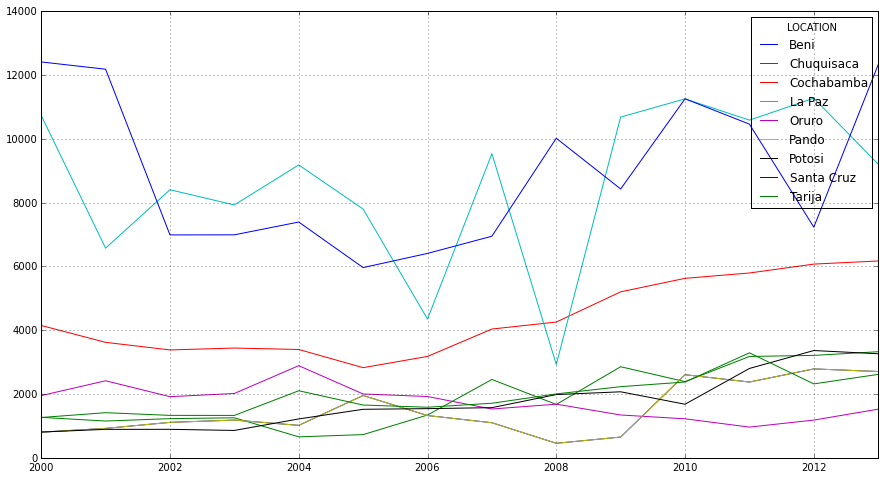

In [32]:
df_by_location.plot(figsize=(15, 8))

##Cantidad de denuncias por tipo

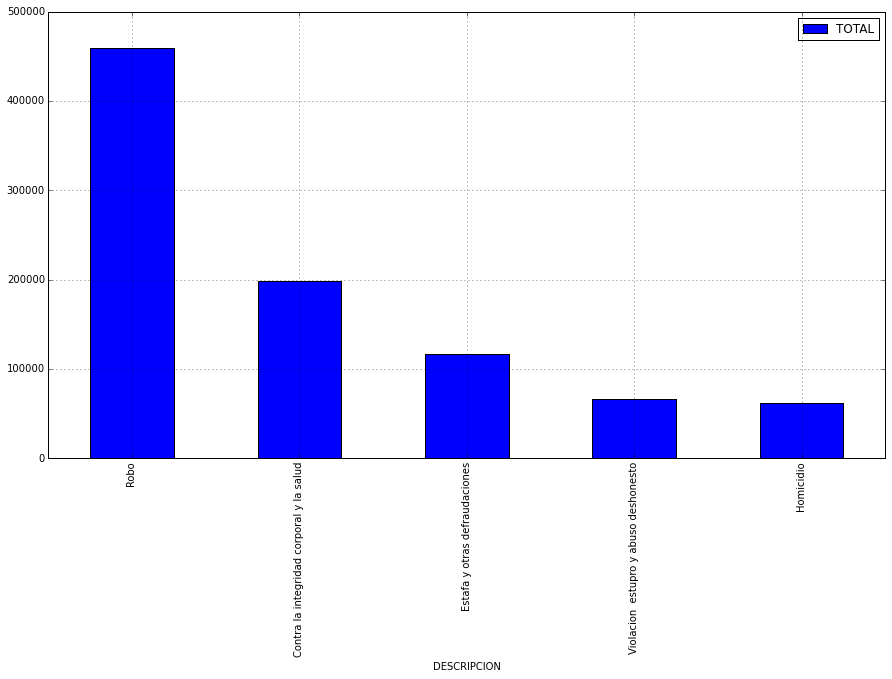

In [47]:
df_by_type = df_final.groupby('DESCRIPCION').sum()
df_by_type['TOTAL'] = df_by_type.sum(axis=1)
df_by_type = df_by_type[['TOTAL']]
df_by_type.sort('TOTAL', ascending=False).plot(kind='bar', figsize=(15, 8))